In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import theano
import lasagne
import theano.tensor as T
from lasagne.layers import get_output, InputLayer, DenseLayer, Upscale2DLayer, ReshapeLayer
from sklearn.decomposition import PCA


In [44]:
def generate_XO_example(num_rows):
    X = np.random.randn(num_rows,2)
    y = []
    for row in X:
        if row[0] * row[1] > 0:
            y.append(1)
        else:
            y.append(0)
    y = np.asarray(y, dtype = np.int32)
    X = np.asarray(X, dtype = np.float32)
    return X,y

In [45]:
X = np.random.randn(1000,2)

In [46]:
y = []
for row in X:
    if row[0] * row[1] > 0:
        y.append(1)
    else:
        y.append(0)

In [47]:
y = np.asarray(y, dtype = np.int32)
X = np.asarray(X, dtype = np.float32)

In [48]:
X[0]

array([-0.10103577,  0.88565272], dtype=float32)

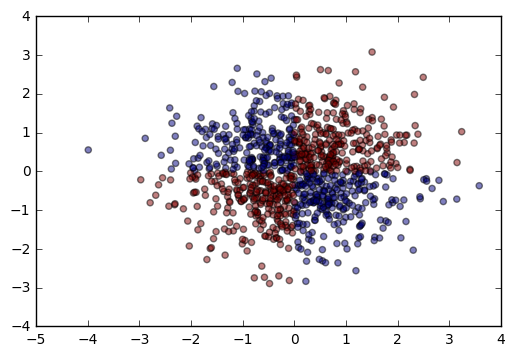

In [49]:
colors = y
plt.scatter(X[:,0], X[:,1], c=colors, alpha = 0.5)

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Use some nice code from [Tom Dupre la Tour](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py)

In [90]:
# @param clf: trained classsifier
def plot_lr_model(X, y):
    if X.shape[1]>2:
        pca = PCA(n_components=2)
        X = pca.fit_transform(X)
    clf = LogisticRegression()
    clf.fit(X, y)
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('tight')

    # Plot also the training points
    colors = "br"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[0, 0]) - intercept[0]) / coef[0, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)
    plt.show()

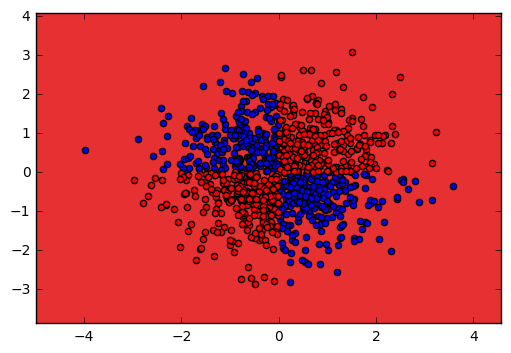

In [69]:
plot_lr_model(X, y)

In [70]:
test_X, test_y = generate_XO_example(1000)

# without training, all weights set to random. 
## initialization in the [way suggested by Kaiming He](https://arxiv.org/abs/1512.03385)

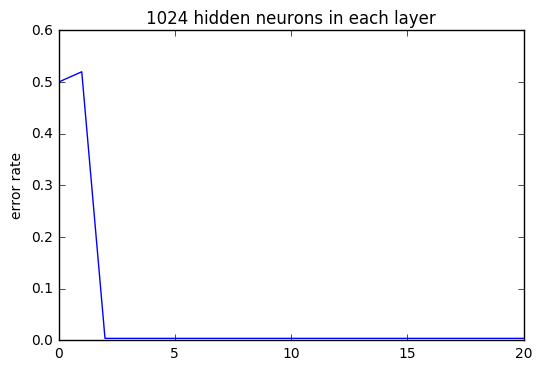

In [121]:
hidden_neurons = 1024
acc_list = []
acc_list.append(0.5)
input_var = T.matrix('inputs')
target_var = T.ivector('target')
l_in = InputLayer(shape=(None, 2), input_var=input_var)
pre_layer = l_in
hidden_layer_list = []
for i in range(10):
    h_layer = DenseLayer(pre_layer, num_units=hidden_neurons, W=lasagne.init.HeNormal(gain='relu'),nonlinearity=None)
    hidden_layer_list.append(h_layer)
    pre_layer = h_layer
    h_layer = lasagne.layers.NonlinearityLayer(pre_layer)
    hidden_layer_list.append(h_layer)
    pre_layer = h_layer
output_list = lasagne.layers.get_output(hidden_layer_list)
output_fn = theano.function([input_var], output_list)
feature_list = output_fn(X)
test_feature_list = output_fn(test_X)
for i in range(20):
    train_feature = feature_list[i]
    lr = LogisticRegression()
    lr.fit(train_feature, y)
    acc_list.append(lr.score(test_feature_list[i], test_y))
acc_list = np.asarray(acc_list)
err = 1-acc_list
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(len(err)),err)
plt.title('{} hidden neurons in each layer'.format(hidden_neurons))
plt.ylabel('error rate')
#plt.savefig('{}_err.png'.format(hidden_neurons))

# a really significent drop after RELU

## plot of the first two principle components for the output of each layer

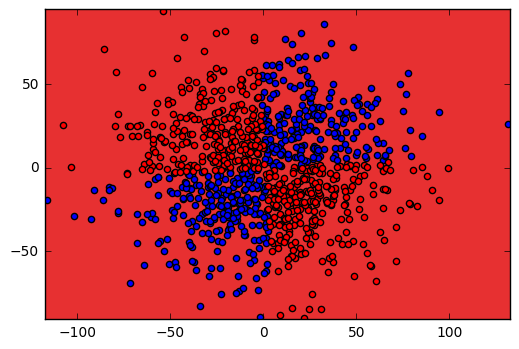

In [113]:
first_layer_feature = feature_list[0]
plot_lr_model(first_layer_feature,y)

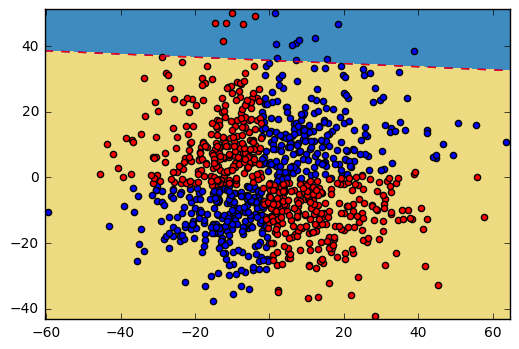

In [114]:
first_layer_feature = feature_list[1]
plot_lr_model(first_layer_feature,y)

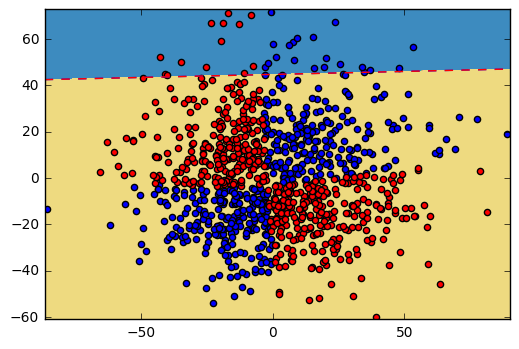

In [115]:
first_layer_feature = feature_list[2]
plot_lr_model(first_layer_feature,y)

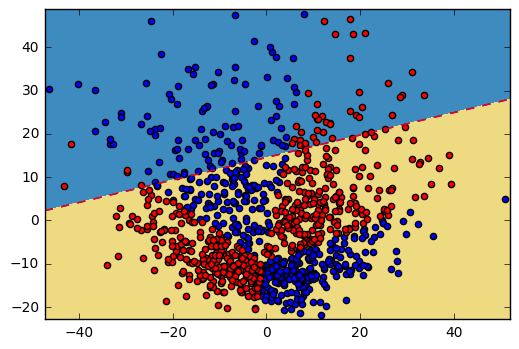

In [116]:
first_layer_feature = feature_list[3]
plot_lr_model(first_layer_feature,y)

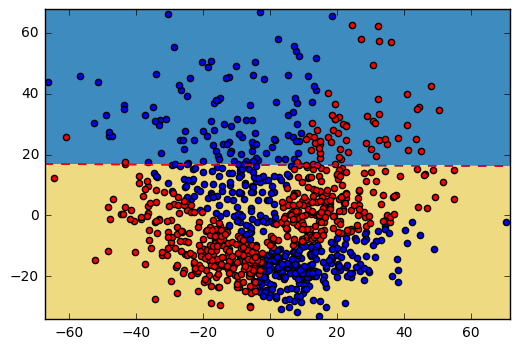

In [117]:
first_layer_feature = feature_list[4]
plot_lr_model(first_layer_feature,y)

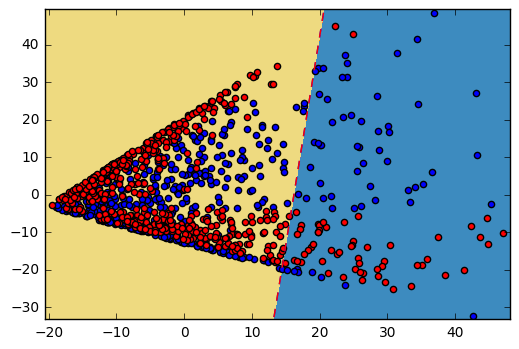

In [118]:
first_layer_feature = feature_list[5]
plot_lr_model(first_layer_feature,y)

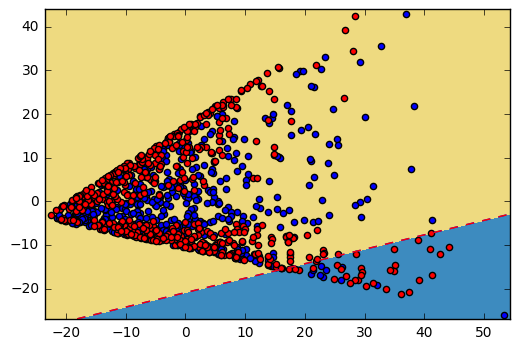

In [120]:
first_layer_feature = feature_list[7]
plot_lr_model(first_layer_feature,y)

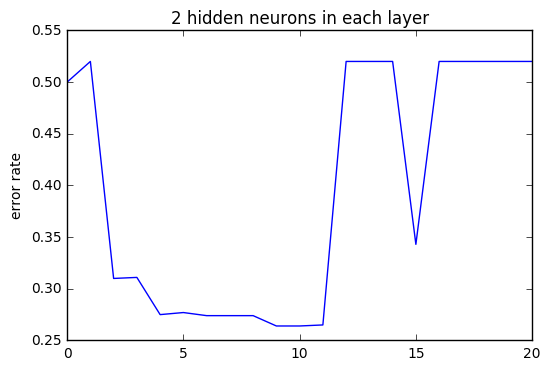

In [123]:
hidden_neurons = 2
acc_list = []
acc_list.append(0.5)
input_var = T.matrix('inputs')
target_var = T.ivector('target')
l_in = InputLayer(shape=(None, 2), input_var=input_var)
pre_layer = l_in
hidden_layer_list = []
for i in range(10):
    h_layer = DenseLayer(pre_layer, num_units=hidden_neurons, W=lasagne.init.HeNormal(gain='relu'),nonlinearity=None)
    hidden_layer_list.append(h_layer)
    pre_layer = h_layer
    h_layer = lasagne.layers.NonlinearityLayer(pre_layer)
    hidden_layer_list.append(h_layer)
    pre_layer = h_layer
output_list = lasagne.layers.get_output(hidden_layer_list)
output_fn = theano.function([input_var], output_list)
feature_list = output_fn(X)
test_feature_list = output_fn(test_X)
for i in range(20):
    train_feature = feature_list[i]
    lr = LogisticRegression()
    lr.fit(train_feature, y)
    acc_list.append(lr.score(test_feature_list[i], test_y))
acc_list = np.asarray(acc_list)
err = 1-acc_list
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(len(err)),err)
plt.title('{} hidden neurons in each layer'.format(hidden_neurons))
plt.ylabel('error rate')
#plt.savefig('{}_err.png'.format(hidden_neurons))

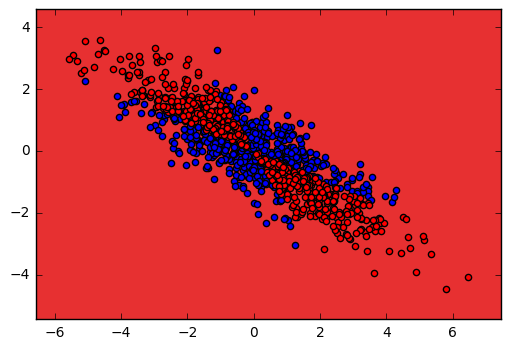

In [124]:
first_layer_feature = feature_list[0]
plot_lr_model(first_layer_feature,y)

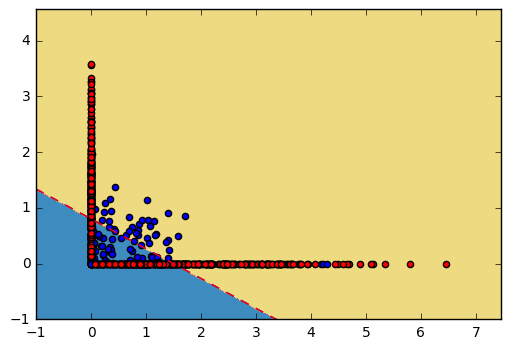

In [125]:
first_layer_feature = feature_list[1]
plot_lr_model(first_layer_feature,y)

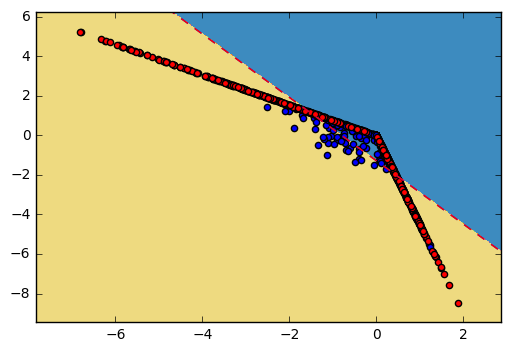

In [126]:
first_layer_feature = feature_list[2]
plot_lr_model(first_layer_feature,y)

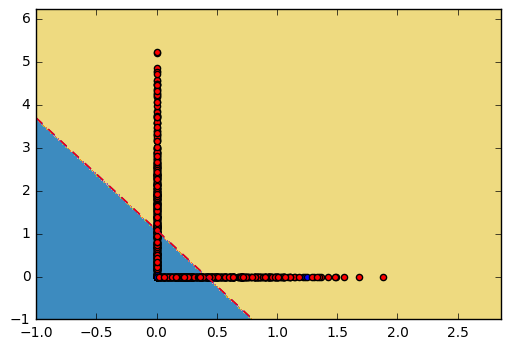

In [127]:
first_layer_feature = feature_list[3]
plot_lr_model(first_layer_feature,y)

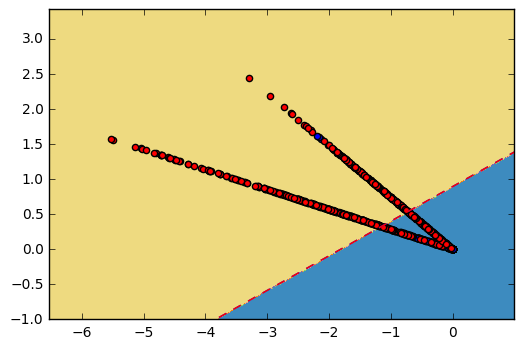

In [128]:
first_layer_feature = feature_list[4]
plot_lr_model(first_layer_feature,y)

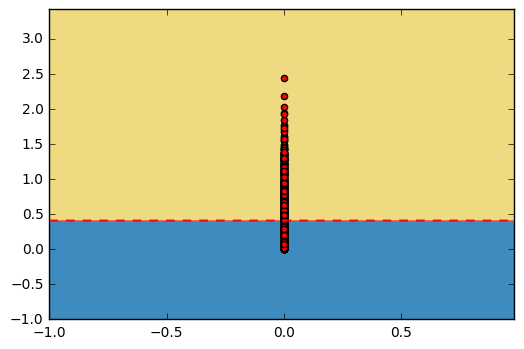

In [129]:
first_layer_feature = feature_list[5]
plot_lr_model(first_layer_feature,y)

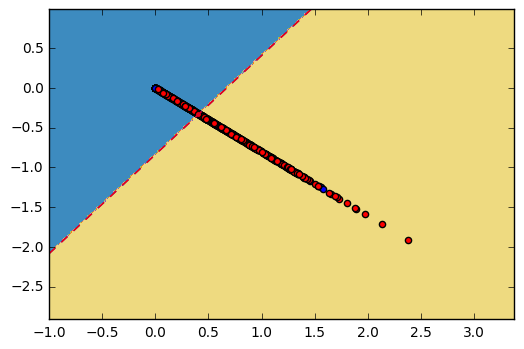

In [130]:
first_layer_feature = feature_list[6]
plot_lr_model(first_layer_feature,y)